In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 15.0)
plt.rcParams['font.family'] = "serif"


import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.filterwarnings('ignore')

In [412]:
file_test = r"D:\000000BookQueue\FAQs\ML\interview\Interview_Assignements\Carrier_Hydrabad\2021-01-21_zeta-disease_prediction-data_dsi-take-home-challenge.csv"
file_train = r"D:\000000BookQueue\FAQs\ML\interview\Interview_Assignements\Carrier_Hydrabad\2021-01-21_zeta-disease_training-data_dsi-take-home-challenge.csv"
df = pd.read_csv(file_train, header=0)
df.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80,0,1.5038,0,10,0
1,23,150,38.5,68,71,0.3868,55,2,0
2,47,186,29.9,90,0,0.2728,0,7,0
3,18,150,30.8,70,1033,0.6598,56,0,0
4,24,160,32.4,74,125,0.7608,59,2,0


In [413]:
df.dtypes

age                     int64
weight                  int64
bmi                   float64
blood_pressure          int64
insulin_test            int64
liver_stress_test     float64
cardio_stress_test      int64
years_smoking           int64
zeta_disease            int64
dtype: object

### Check Missing Data

In [414]:
df.isnull().sum()

age                   0
weight                0
bmi                   0
blood_pressure        0
insulin_test          0
liver_stress_test     0
cardio_stress_test    0
years_smoking         0
zeta_disease          0
dtype: int64

In [415]:
df.describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,30.985000,172.407500,32.201625,69.565000,85.887500,0.544496,43.121250,4.051250,0.348750
std,13.824025,31.942438,8.549155,19.874784,126.333656,0.348711,30.409949,4.176173,0.476873
min,18.000000,94.000000,0.000000,0.000000,0.000000,0.140800,0.000000,0.000000,0.000000
25%,21.000000,149.000000,27.300000,62.000000,0.000000,0.307800,0.000000,1.000000,0.000000
50%,26.000000,167.000000,32.050000,72.000000,45.000000,0.445300,53.000000,3.000000,0.000000
75%,38.000000,192.000000,36.525000,80.000000,130.000000,0.699800,62.000000,6.000000,1.000000
max,109.000000,308.000000,86.100000,157.000000,1077.000000,3.481300,214.000000,40.000000,1.000000


### Understand the zero values

In [416]:
# Rows where bmi = 0
print(f"Number of rows where BMI=0 is '{len(df[df.bmi == 0])}'. % 0 value of overall value is {(len(df[df.bmi == 0])/len(df)*100)}%")
df[df.bmi == 0].head()


Number of rows where BMI=0 is '11'. % 0 value of overall value is 1.375%


,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
27,66,186,0.0,82,0,0.7028,0,5,0
146,18,152,0.0,75,0,0.6348,53,0,0
227,21,155,0.0,0,0,0.3678,0,7,0
354,23,164,0.0,0,0,0.2518,0,6,0
447,22,144,0.0,0,0,0.3188,0,0,0


In [417]:
# Rows where blood_pressure = 0
print(f"Number of rows where blood_pressure=0 is '{len(df[df.blood_pressure == 0])}', % 0 value of overall value is {(len(df[df.blood_pressure == 0])/len(df)*100)}% ")
df[df.blood_pressure == 0].head()

Number of rows where blood_pressure=0 is '35', % 0 value of overall value is 4.375% 


,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
25,28,141,29.8,0,0,0.5638,0,6,0
68,41,167,33.8,0,0,0.9948,0,0,0
74,25,196,27.5,0,0,0.3028,0,2,1
77,29,150,30.0,0,0,0.5468,0,7,1
80,26,165,35.3,0,0,0.1968,0,10,0


In [418]:
# BMI = 0 has no meaning so, either we drop the coulmn with BMI= 0 
# Or, somehow impute the value
# We will go ahead with Dropping the value as these only 1.375%
df = df[df.bmi != 0]
print(f"Number of sample now is {len(df)}")

Number of sample now is 789


In [419]:
# blood_pressure = 0 has no meaning so, either we drop the coulmn with blood_pressure= 0 
# Or, somehow impute the value
# We will go ahead with Dropping the value as these only 4.375%
df = df[df.blood_pressure != 0]
print(f"Number of sample now is {len(df)}")

Number of sample now is 761


In [420]:
print(f"Number of rows where insulin_test=0 is '{len(df[df.insulin_test == 0])}'")
df[df.insulin_test == 0.0].head()
# Assuming insulin_test=0 may have some meaning

Number of rows where insulin_test=0 is '332'


,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80,0,1.5038,0,10,0
2,47,186,29.9,90,0,0.2728,0,7,0
5,49,158,27.0,80,0,0.3218,0,2,1
9,19,186,31.2,70,0,1.2448,0,4,1
11,24,172,36.8,70,0,0.4028,57,2,0


In [421]:
print(f"Number of rows where cardio_stress_test=0 is '{len(df[df.cardio_stress_test == 0])}'")
df[df.cardio_stress_test == 0.0].head()
# Assuming cardio_stress_test=0 may have some meaning

Number of rows where cardio_stress_test=0 is '192'


,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80,0,1.5038,0,10,0
2,47,186,29.9,90,0,0.2728,0,7,0
5,49,158,27.0,80,0,0.3218,0,2,1
9,19,186,31.2,70,0,1.2448,0,4,1
18,24,123,26.8,60,0,0.3308,0,5,0


### Outlier

In [422]:
from scipy import stats

In [423]:
z_score_ndarray = np.abs(stats.zscore(df))
z_score_df = pd.DataFrame(z_score_ndarray, columns=df.columns)
col_names = df.columns
num_sigma = 4
outl = len(z_score_df[(z_score_df[col_names]>num_sigma).any(axis=1)])
print(f"Number of outlier at {num_sigma} Sigma = {outl} | % outlier = {(outl/len(z_score_df))* 100}%")

Number of outlier at 4 Sigma = 38 | % outlier = 4.993429697766097%


* Number of outlier at 4 Sigma = 38 | % outlier = 4.99%
* Number of outlier at 3 Sigma = 67 | % outlier = 8.80%
* Percentage outliers are too many (5% for 4 sigma and ~9% for 3 sigma). This indicates that Outliers are NOT a measurement error and hence it is not a good idea to treat these outlier by dropping these points. In other words, the data has higher variability.
* Instead of clipping the outlier, we can use Algorithms like Random Forest, Gradient Boosting, SVM etc which are Outlier tolerant.
* Or treat the outlier with some transformation e.g., log-scale transformation and try using any classification algorithm


### Corelation

In [424]:
df.drop("zeta_disease", axis=1).corr()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking
age,1.000000,0.150498,0.023642,0.233124,-0.040191,0.036397,-0.121699,0.374950
weight,0.150498,1.000000,0.198225,0.152208,0.308353,0.146330,0.050580,0.104298
bmi,0.023642,0.198225,1.000000,0.215219,0.211148,0.123268,0.242168,0.026270
blood_pressure,0.233124,0.152208,0.215219,1.000000,-0.042912,0.008683,-0.022208,0.119467
insulin_test,-0.040191,0.308353,0.211148,-0.042912,1.000000,0.172606,0.397923,-0.009572
liver_stress_test,0.036397,0.146330,0.123268,0.008683,0.172606,1.000000,0.161508,0.031006
cardio_stress_test,-0.121699,0.050580,0.242168,-0.022208,0.397923,0.161508,1.000000,-0.094475
years_smoking,0.374950,0.104298,0.026270,0.119467,-0.009572,0.031006,-0.094475,1.000000


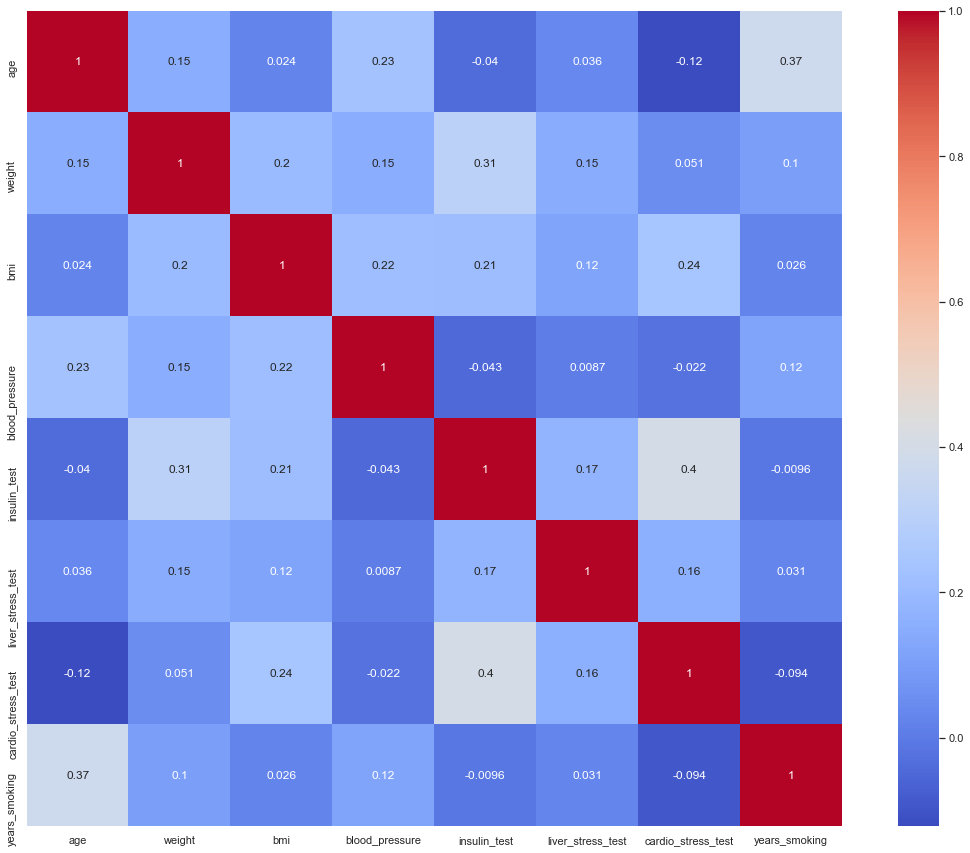

In [425]:
sns.heatmap(df.drop("zeta_disease", axis=1).corr(), square=True,annot=True, cmap='coolwarm')
# Work around for picture getting clipped at the top and bottom
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [426]:
#Highest Correations are between age and blood_pressure (0.23) & age and years_smoking (0.37)
# These vaues are not very high, so we can use these for modeling.

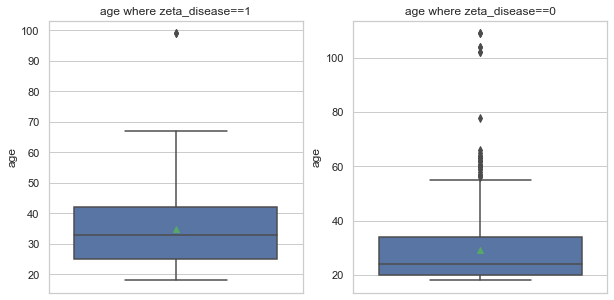

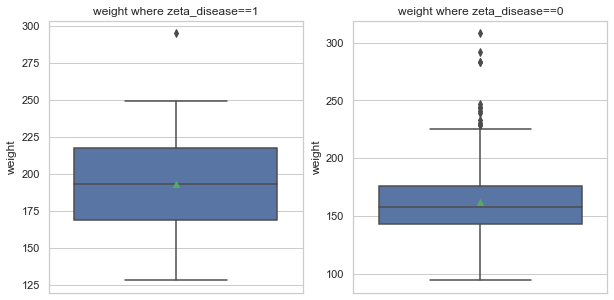

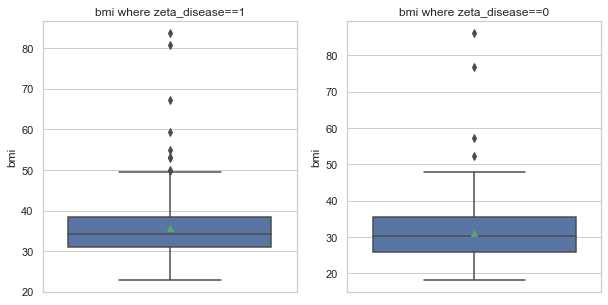

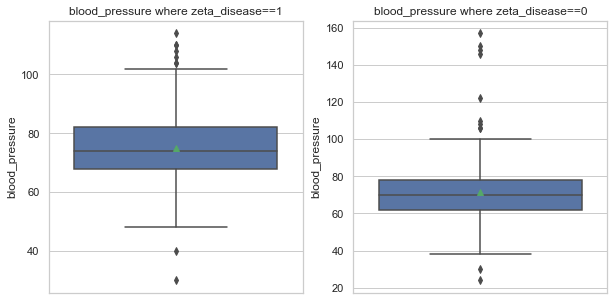

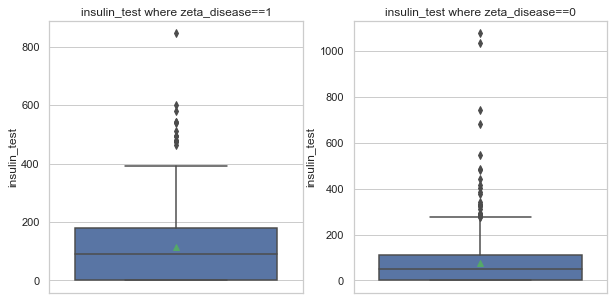

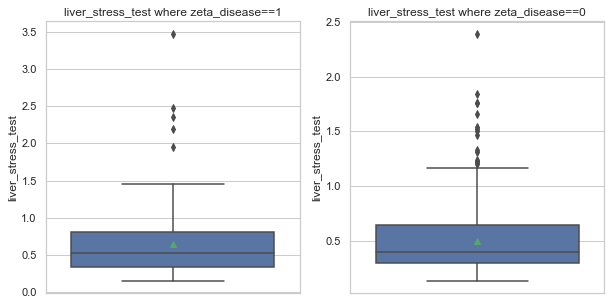

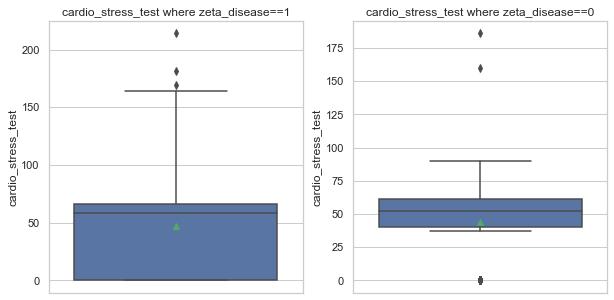

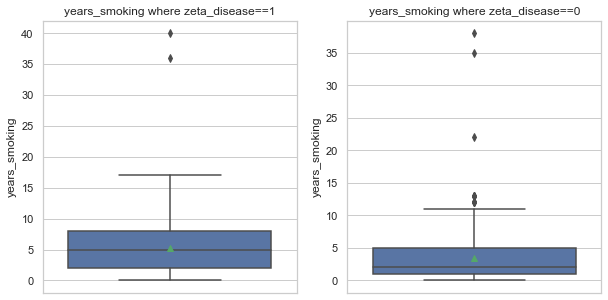

In [427]:
#fig, axes = plt.subplots(2, 4, figsize=(10,5))
k=0
IV_cols = df.drop("zeta_disease", axis=1).columns
for k in IV_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    sns.boxplot(ax = axes[0], data=df[df.zeta_disease==1], y=k, showmeans=True)
    axes[0].set_title(f"{k} where zeta_disease==1")
    sns.boxplot(ax = axes[1], data=df[df.zeta_disease==0], y=k, showmeans=True)
    axes[1].set_title(f"{k} where zeta_disease==0")
    
        




### Independent Variable and Target Variable Relationship

In [428]:
from scipy.stats import ttest_ind
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-0.496, p=0.627
Probably the same distribution


In [429]:
# Student’s t-test
# Tests whether the means of two independent samples are significantly different.
# H0: the means of the samples are equal.
# H1: the means of the samples are unequal.

IV = list(df.columns)[0:-1]
for f in IV:
    stat, p = ttest_ind(df[df.zeta_disease == 1][f], df[df.zeta_disease == 0][f])
    print(f"{f}: stat = {stat}, p = {p}", end =" | ")
    if p > 0.05:
        print('Probably the same distribution')
    else:
        print('Probably different distributions')

age: stat = 5.6307747037740015, p = 2.5264763547838992e-08 | Probably different distributions
weight: stat = 14.466697843561834, p = 4.526283516908633e-42 | Probably different distributions
bmi: stat = 7.879183112614845, p = 1.14243296138387e-14 | Probably different distributions
blood_pressure: stat = 3.4704340683027923, p = 0.0005489739389748343 | Probably different distributions
insulin_test: stat = 3.864764926404929, p = 0.00012070655351683147 | Probably different distributions
liver_stress_test: stat = 5.539988595829811, p = 4.172808380257732e-08 | Probably different distributions
cardio_stress_test: stat = 1.5107825833424833, p = 0.13126005047233907 | Probably the same distribution
years_smoking: stat = 5.597017086502176, p = 3.0472026368565573e-08 | Probably different distributions


### Class Percentage

In [430]:
cls_per = (len(df[df.zeta_disease==1])/len(df)) *100
print(f"Target Class Percentage = {cls_per}%")

# Target Class Percentage = 34.43%, So Class is balanced and hence no treatment is required

Target Class Percentage = 34.42838370565046%


### Modeling

* We can start with Logistic Regression as a base model, as all are numerical features
* It just doen't give the relationship between Independent variables and target varible, also it gives driver variables as well.
* Dependent variables are independent of each other as pair-wise correlation coffiecients are not very high (max=0.37).


In [431]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [432]:
print(f"Total number of samples {len(df)}")
df.head()

Total number of samples 761


,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80,0,1.5038,0,10,0
1,23,150,38.5,68,71,0.3868,55,2,0
2,47,186,29.9,90,0,0.2728,0,7,0
3,18,150,30.8,70,1033,0.6598,56,0,0
4,24,160,32.4,74,125,0.7608,59,2,0


#### Normalize Values

In [433]:
df_IV = df.drop("zeta_disease", axis=1)
# df_IV = df_IV.drop("cardio_stress_test", axis=1)
# df_IV = df_IV.drop("blood_pressure", axis=1)
# df_IV = df_IV.drop("liver_stress_test", axis=1)
# df_IV = df_IV.drop("insulin_test", axis=1)
# df_IV = df_IV.drop("age", axis=1)

# Applying SQRT Transformation to reduce the effect
# There are 0 value so log transformation wouldn't work.
df_IV["cardio_stress_test"] = np.sqrt(np.abs(df_IV["cardio_stress_test"]))
df_IV["blood_pressure"] = np.sqrt(np.abs(df_IV["blood_pressure"]))
df_IV["liver_stress_test"] = np.sqrt(np.abs(df_IV["liver_stress_test"]))
df_IV["insulin_test"] = np.sqrt(np.abs(df_IV["insulin_test"]))

df_IV = (df_IV - df_IV.mean()) / df_IV.std()


In [434]:

x_train, x_test, y_train, y_test = train_test_split(df_IV, df.zeta_disease, test_size=0.2, random_state=0)

In [435]:
#print(list(y_train))

#### 

In [436]:
import statsmodels.api as sm
sm_model=sm.Logit(y_train,x_train)
result=sm_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.534250
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           zeta_disease   No. Observations:                  608
Model:                          Logit   Df Residuals:                      600
Method:                           MLE   Df Model:                            7
Date:                Mon, 22 Feb 2021   Pseudo R-squ.:                  0.1656
Time:                        23:50:30   Log-Likelihood:                -324.82
converged:                       True   LL-Null:                       -389.27
Covariance Type:            nonrobust   LLR p-value:                 1.071e-24
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
age                    0.1770      0.106      1.665      0.096      -0.031       0.385
weigh

In [437]:
y_pred_df = []


In [438]:
LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [306]:
y_pred = LR_model.predict(x_test)


In [352]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report

confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)
print('Test Accuracy: {:.2f}'.format(LR_model.score(x_test, y_test)))
print(f'accuracy_score: {accuracy_score(y_test, y_pred)}')
print(f'precision_score: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'f1_score: {f1_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

[[84 13]
 [25 31]]
Test Accuracy: 0.75
accuracy_score: 0.7516339869281046
precision_score: 0.7045454545454546
Recall: 0.5535714285714286
f1_score: 0.62
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        97
           1       0.70      0.55      0.62        56

    accuracy                           0.75       153
   macro avg       0.74      0.71      0.72       153
weighted avg       0.75      0.75      0.74       153



In [308]:
from sklearn.model_selection import GridSearchCV
grid={
    "C":np.logspace(-3,3,7), #Inverse of regularization strength; smaller values specify stronger regularization.
    "penalty":["l1","l2"]    # l1 lasso l2 ridge
    }
lr_m=LogisticRegression()
logreg_cv=GridSearchCV(lr_m,grid,cv=10)
logreg_cv.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [271]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l1'}
accuracy : 0.7763157894736842


In [332]:
LR_model2=LogisticRegression(C=0.01,penalty="l2")
LR_model2.fit(x_train,y_train)
print("score",LR_model2.score(x_test,y_test))

score 0.7581699346405228


In [333]:
y_pred_df = []


In [395]:
LR_model2=LogisticRegression(C=0.01,penalty="l2")
LR_model2.fit(x_train,y_train)
print("score",LR_model2.score(x_test,y_test))
y_pred = LR_model2.predict(x_test)
y_pred_df.append(y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)
print('Test Accuracy: {:.2f}'.format(LR_model2.score(x_test, y_test)))

threshold = 0.3
LR_Grid_ytest_THR = ((LR_model2.predict_proba(x_test)[:, 1])>= threshold).astype(int)
print(f'accuracy_score: {accuracy_score(y_test, LR_Grid_ytest_THR)}')
print(f'precision_score: {precision_score(y_test, LR_Grid_ytest_THR)}')
print(f'Recall: {recall_score(y_test, LR_Grid_ytest_THR)}')
print(f'f1_score: {f1_score(y_test, LR_Grid_ytest_THR)}')

print(classification_report(y_test, LR_Grid_ytest_THR))

[[82 15]
 [22 34]]
Test Accuracy: 0.76
accuracy_score: 0.6535947712418301
precision_score: 0.5142857142857142
Recall: 0.9642857142857143
f1_score: 0.670807453416149
              precision    recall  f1-score   support

           0       0.96      0.47      0.63        97
           1       0.51      0.96      0.67        56

    accuracy                           0.65       153
   macro avg       0.74      0.72      0.65       153
weighted avg       0.80      0.65      0.65       153



#### Random Forest Classifier

In [220]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42, n_jobs=-1)

param_grid = { 
    'n_estimators': [10, 20, 25],  #The number of trees in the forest.
    'max_features': ['auto'],  # The number of features to consider when looking for the best split
    'max_depth' : [4],
    'criterion' :['entropy']
}


rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 10)
rf_cv.fit(x_train, y_train)




C:\Users\nkumar\.conda\envs\exp_torch\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'c

In [221]:
# {rf_cv.best_params_:{'criterion': 'entropy',
#  'max_depth': 4,
#  'max_features': 'auto',
#  'n_estimators': 25}} # First round output
rf_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 20}

In [375]:
rf_final = RandomForestClassifier(random_state = 42, 
                                  max_features='auto', 
                                  n_estimators= 5, 
                                  max_depth=3, 
                                  criterion='entropy',
                                  n_jobs=-1)
rf_final.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [377]:
y_pred = rf_final.predict(x_test)
y_pred_df.append(y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)
print('Test Accuracy: {:.2f}'.format(rf_final.score(x_test, y_test)))
print(f'accuracy_score: {accuracy_score(y_test, y_pred)}')
print(f'precision_score: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'f1_score: {f1_score(y_test, y_pred)}')

print(classification_report(y_test, y_pred))

[[87 10]
 [32 24]]
Test Accuracy: 0.73
accuracy_score: 0.7254901960784313
precision_score: 0.7058823529411765
Recall: 0.42857142857142855
f1_score: 0.5333333333333333
              precision    recall  f1-score   support

           0       0.73      0.90      0.81        97
           1       0.71      0.43      0.53        56

    accuracy                           0.73       153
   macro avg       0.72      0.66      0.67       153
weighted avg       0.72      0.73      0.71       153



#### Gradient Boosting

In [276]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.02, 0.1],
    "min_samples_split": np.linspace(0.1, 0.5, 3),
    "max_depth":[3,4],
    "criterion": ["friedman_mse"],
    "subsample":[0.8],
    "n_estimators":[10]
    }

db_model = GradientBoostingClassifier()
gb_cv = GridSearchCV(db_model, parameters, cv=10, n_jobs=-1)

gb_cv.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_n...
                                                  subsample=1.0, tol

In [277]:
gb_cv.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'min_samples_split': 0.1,
 'n_estimators': 10,
 'subsample': 0.8}

In [337]:
gb_final = GradientBoostingClassifier(criterion='friedman_mse',
                                    learning_rate=0.1,
                                    loss='deviance', 
                                    max_depth=3,
                                     min_samples_split=0.3,
                                     n_estimators=10,
                                     subsample=1)
gb_final.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=0.3,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [338]:
y_pred = gb_final.predict(x_test)
y_pred_df.append(y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)
print('Test Accuracy: {:.2f}'.format(gb_final.score(x_test, y_test)))
print(classification_report(y_test, y_pred))

[[89  8]
 [33 23]]
Test Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.73      0.92      0.81        97
           1       0.74      0.41      0.53        56

    accuracy                           0.73       153
   macro avg       0.74      0.66      0.67       153
weighted avg       0.73      0.73      0.71       153



In [364]:
from sklearn.svm import SVC

parameters = {
    'kernel':('linear', 'rbf', 'poly'), 
    'C':[0.2, 0.3,0.4,0.5, 1, 10, 100]
}

svm_cv = GridSearchCV(SVC(), param_grid=parameters)
svm_cv.fit(x_train,y_train)



GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.2, 0.3, 0.4, 0.5, 1, 10, 100],
                         'kernel': ('linear', 'rbf', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [365]:
svm_cv.best_params_

{'C': 0.2, 'kernel': 'linear'}

In [366]:
svm_final = SVC(C=0.2, kernel='linear')
svm_final.fit(x_train,y_train)


SVC(C=0.2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [367]:
y_pred = svm_final.predict(x_test)
y_pred_df.append(y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)
print('Test Accuracy: {:.2f}'.format(svm_final.score(x_test, y_test)))
print(f'precision_score: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'f1_score: {f1_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

[[84 13]
 [26 30]]
Test Accuracy: 0.75
precision_score: 0.6976744186046512
Recall: 0.5357142857142857
f1_score: 0.6060606060606061
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        97
           1       0.70      0.54      0.61        56

    accuracy                           0.75       153
   macro avg       0.73      0.70      0.71       153
weighted avg       0.74      0.75      0.74       153



### Check if Stacking can improve the output

In [355]:
model_outputs_df = pd.DataFrame(columns=["LR", "RF", "GB", "SVM","OBS"])
model_outputs_df.LR = y_pred_df[0]
model_outputs_df.RF = y_pred_df[1]
model_outputs_df.GB = y_pred_df[2]
model_outputs_df.SVM = y_pred_df[3]
model_outputs_df.OBS = list(y_test)
#model_outputs_df

In [386]:
def label_max_poll (row):
    sum_all = row["SVM"] + row["GB"] + row["RF"] #row["LR"]  + 
    if sum_all >= 2 and row['OBS'] == 1:
        return 1
    elif sum_all >= 2 and row['OBS'] == 0:
        return 0
    elif sum_all < 2 and row['OBS'] == 0:
        return 1
    else:
        return 0
def compare_obs(row):
    if row['OBS'] == row['max_poll']:
        return 1
    else:
        return 0
    

In [387]:
model_outputs_df['max_poll'] = model_outputs_df.apply(lambda row: label_max_poll(row), axis=1) 


In [390]:
#Approximate Accuracy of stacked model
model_outputs_df['max_poll'].sum()/len(model_outputs_df) *100

# 73.86 is almost same as single model accuracy, Stacking of model is not going to help.

73.8562091503268

### Conclusion


* Logistic Regression, Random Forest, Gradient Boosting and SVM are giving same accuracy.
* We should pick Logistic Regression, as 

* This is simpler Model,
* Provide you the driver variables
* Adjust the thesshold to fine-tune precision/recall depending on the business need. In our case Recall is more important because person with zeta disease shoudn't be missed out. We can achieve this at the expense of precision
* From Grid search of SVM model, the optimum kernel was 'linear'. So we can infer that the data is linearly seprable.
* Outliers have been handles Square Root Transformation which reduces the higher vaues more than the lower values. Log transformation was not possible because of 0 values in the data.
* Threshold has been set as 0.3.
* accuracy_score: 0.6535947712418301
* precision_score: 0.5142857142857142
* Recall: 0.9642857142857143  -> Very good Recall.

In [401]:
# Training time model (Final)
LR_model2=LogisticRegression(C=0.01,penalty="l2")
LR_model2.fit(x_train,y_train)
print("score",LR_model2.score(x_test,y_test))
y_pred = LR_model2.predict(x_test)
y_pred_df.append(y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)
print('Test Accuracy: {:.2f}'.format(LR_model2.score(x_test, y_test)))

threshold = 0.3
LR_Grid_ytest_THR = ((LR_model2.predict_proba(x_test)[:, 1])>= threshold).astype(int)
print(f'accuracy_score: {accuracy_score(y_test, LR_Grid_ytest_THR)}')
print(f'precision_score: {precision_score(y_test, LR_Grid_ytest_THR)}')
print(f'Recall: {recall_score(y_test, LR_Grid_ytest_THR)}')
print(f'f1_score: {f1_score(y_test, LR_Grid_ytest_THR)}')

print(classification_report(y_test, LR_Grid_ytest_THR))

score 0.7581699346405228
[[82 15]
 [22 34]]
Test Accuracy: 0.76
accuracy_score: 0.6535947712418301
precision_score: 0.5142857142857142
Recall: 0.9642857142857143
f1_score: 0.670807453416149
              precision    recall  f1-score   support

           0       0.96      0.47      0.63        97
           1       0.51      0.96      0.67        56

    accuracy                           0.65       153
   macro avg       0.74      0.72      0.65       153
weighted avg       0.80      0.65      0.65       153



### Predicting the test data

In [400]:
file_predict = r"D:\000000BookQueue\FAQs\ML\interview\Interview_Assignements\Carrier_Hydrabad\2021-01-21_zeta-disease_prediction-data_dsi-take-home-challenge.csv"
df_predict = pd.read_csv(file_predict, header=0)
df_predict.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,24,151,39.5,69,72,1.3968,56,4,NaN
1,27,179,35.5,89,156,1.6608,43,6,NaN
2,34,147,26.9,76,74,1.6958,53,2,NaN
3,35,206,32.4,73,127,1.4608,61,6,NaN
4,60,193,29.8,62,192,1.7798,65,9,NaN


In [405]:
df_IV_pred = df_predict.drop("zeta_disease", axis=1)

# Applying SQRT Transformation to reduce the effect
# There are 0 value so log transformation wouldn't work.
df_IV_pred["cardio_stress_test"] = np.sqrt(np.abs(df_IV_pred["cardio_stress_test"]))
df_IV_pred["blood_pressure"] = np.sqrt(np.abs(df_IV_pred["blood_pressure"]))
df_IV_pred["liver_stress_test"] = np.sqrt(np.abs(df_IV_pred["liver_stress_test"]))
df_IV_pred["insulin_test"] = np.sqrt(np.abs(df_IV_pred["insulin_test"]))

df_IV_pred = (df_IV_pred - df_IV_pred.mean()) / df_IV_pred.std()


In [406]:
# Building Logistic Regression Model with best parameter using complete training data 
LR_model_final=LogisticRegression(C=0.01,penalty="l2")
LR_model_final.fit(df_IV,df.zeta_disease)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [407]:
y_pred_test_data = LR_model_final.predict(df_IV_pred)


In [410]:
file_predict_output = r"D:\000000BookQueue\FAQs\ML\interview\Interview_Assignements\Carrier_Hydrabad\2021-01-21_zeta-disease_prediction-data_dsi-take-home-challenge_output_Niraj_Kumar.csv"
df_IV_pred['zeta_disease'] = y_pred_test_data


In [411]:
df_IV_pred.to_csv(file_predict_output)

### Future work

* Logistic Regression works well with larger dataset, so we should try coleting more data and then build the Logistic Regression model on it.
* With arger data set we can try Neural Networks as well.
* We can incorporate business input into feature engineering, it may help in deriving new features which may help in enhancing KPIs